In [ ]:
!pip install datasets
!pip install gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is i

In [ ]:
!gdown --id 1bl6O7PxyFQckzebf83_QZEor6bYq0iyX
!gdown --id 1Wc8oWVy0i8arzVzGiSPUJOd5W2U7D5VO

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bl6O7PxyFQckzebf83_QZEor6bYq0iyX
To: /content/average_df_gpu.csv
100% 506/506 [00:00<00:00, 760kB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Wc8oWVy0i8arzVzGiSPUJOd5W2U7D5VO
To: /content/all_raw_results_gpu.json
100% 101M/101M [00:01<00:00, 70.4MB/s] 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

with open("all_raw_results_gpu.json", "rt") as f:
  all_raw_results = json.load(f)

all_raw_results = {outer_key: {int(inner_key): inner_value for inner_key, inner_value in inner_dict.items()}
        for outer_key, inner_dict in all_raw_results.items()}

average_df = pd.read_csv("average_df_gpu.csv", index_col='Format')

iterations=1

In [ ]:
from datasets import load_dataset

ds = load_dataset("HichTala/dota")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

train-00000-of-00011.parquet:   0%|          | 0.00/451M [00:00<?, ?B/s]

train-00001-of-00011.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

train-00002-of-00011.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

train-00003-of-00011.parquet:   0%|          | 0.00/449M [00:00<?, ?B/s]

train-00004-of-00011.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

train-00005-of-00011.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00006-of-00011.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

train-00007-of-00011.parquet:   0%|          | 0.00/457M [00:00<?, ?B/s]

train-00008-of-00011.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00009-of-00011.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

train-00010-of-00011.parquet:   0%|          | 0.00/450M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/184M [00:00<?, ?B/s]

test-00000-of-00002.parquet:   0%|          | 0.00/316M [00:00<?, ?B/s]

test-00001-of-00002.parquet:   0%|          | 0.00/312M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/54087 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6854 [00:00<?, ? examples/s]

In [ ]:
from tqdm import tqdm
import os
from datasets import load_dataset

# Создание директории images внутри /content
image_dir = "images"
os.makedirs(image_dir, exist_ok=True)

# Извлечение и сохранение ТОЛЬКО тестовых изображений
image_paths = []
for i, example in enumerate(tqdm(ds['test'], desc="Saving test images")):
    image = example['image']
    image_path = os.path.join(image_dir, f"test_image_{i}.jpg")  # Относительный путь
    image.save(image_path)
    image_paths.append(image_path)

Saving test images: 100%|██████████| 6854/6854 [00:44<00:00, 153.97it/s]


In [ ]:
average_df

,Total Inference Time (s),Peak Memory Usage (MB),Avg. Preprocess Time (ms),Avg. Inference Time (ms),Avg. Postprocess Time (ms)
Format,,,,,
ONNX,585.570583,3295.515625,9.603325,73.038790,2.792753
PyTorch,435.282531,2918.468750,9.071319,51.707667,2.728824
TensorRT,402.753944,3223.148438,9.275291,46.872377,2.614215
TorchScript,440.548046,3298.011719,9.351965,52.136482,2.787603


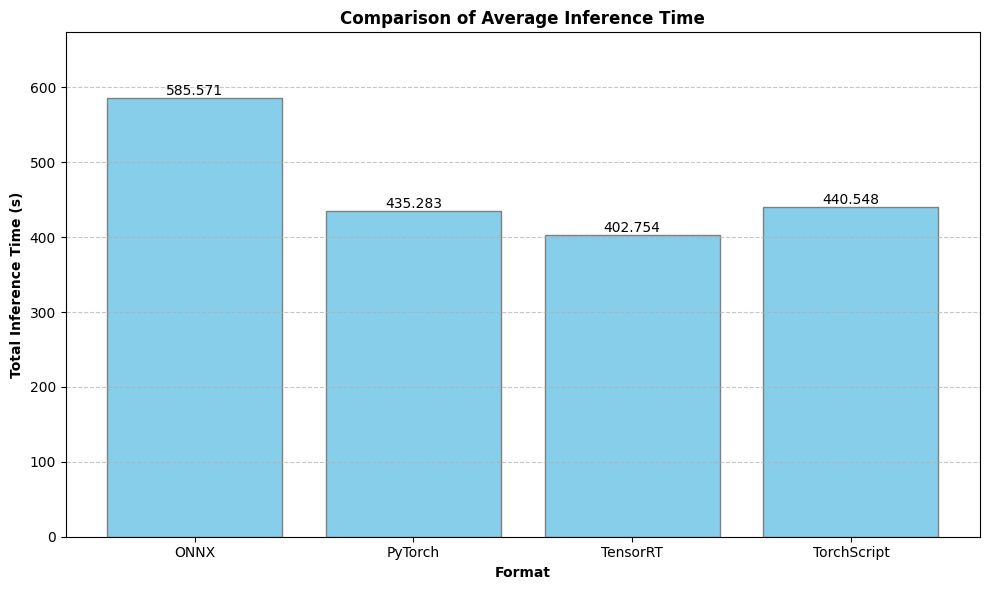

In [ ]:
# 1. Столбчатая диаграмма (Bar Chart) для сравнения среднего времени инференса

plt.figure(figsize=(10, 6))

# Используем average_df напрямую
bars = plt.bar(average_df.index, average_df['Total Inference Time (s)'], color='skyblue', edgecolor='grey')

# Добавляем подписи значений НАД столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001,  # Небольшой сдвиг вверх
             f"{yval:.3f}",  # Форматируем до 3 знаков после запятой
             ha='center',  # Центрируем по горизонтали
             va='bottom',   # Выравниваем по нижнему краю
             fontsize=10,
             color='black')

# Добавляем подписи осей и заголовок
plt.xlabel('Format', fontweight='bold')
plt.ylabel('Total Inference Time (s)', fontweight='bold')
plt.title('Comparison of Average Inference Time', fontweight='bold')

# Добавляем горизонтальную сетку
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, average_df['Total Inference Time (s)'].max() * 1.15)

plt.tight_layout()
plt.show()


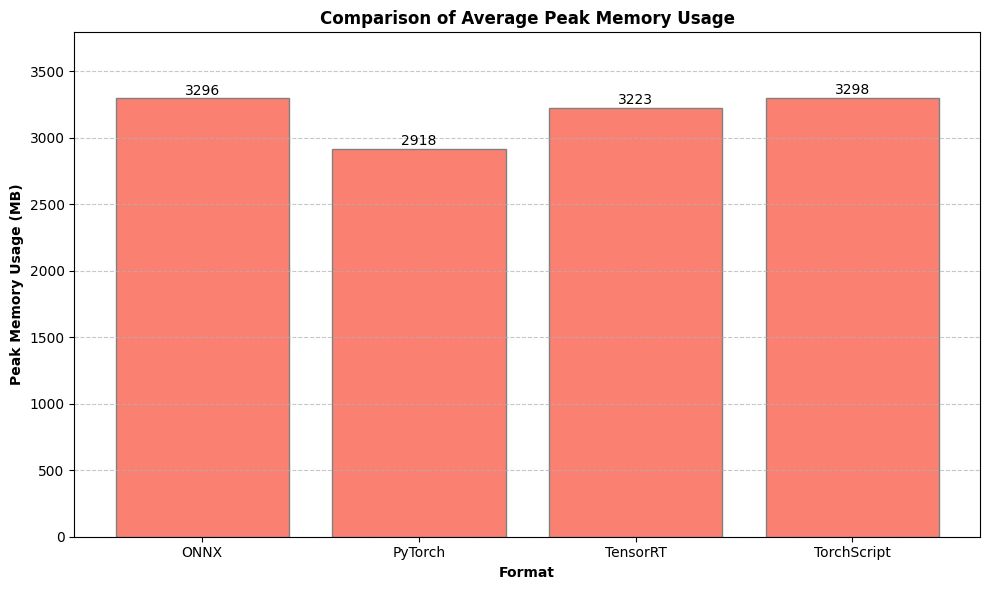

In [ ]:
# 2. Столбчатая диаграмма (Bar Chart) для сравнения пикового использования памяти

plt.figure(figsize=(10, 6))

bars = plt.bar(average_df.index, average_df['Peak Memory Usage (MB)'], color='salmon', edgecolor='grey')

# Добавляем подписи значений НАД столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, # Небольшой сдвиг
             f"{yval:.0f}",  # Целые числа для памяти
             ha='center',
             va='bottom',
             fontsize=10,
             color='black')

plt.xlabel('Format', fontweight='bold')
plt.ylabel('Peak Memory Usage (MB)', fontweight='bold')
plt.title('Comparison of Average Peak Memory Usage', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, average_df['Peak Memory Usage (MB)'].max() * 1.15)  # Место сверху

plt.tight_layout()
plt.show()

In [ ]:
# Собираем данные в DataFrame, ПРАВИЛЬНО считая номер изображения
line_data = []
image_number_map = {}  # Словарь для хранения соответствия image_path -> image_number
image_counter = 0

for iteration in range(iterations): # Сначала итерируем по итерациям
  for image_path in image_paths:      #  Потом итерируем по image_paths
      if image_path not in image_number_map:
          # Это новое изображение, присваиваем ему номер
          image_number_map[image_path] = image_counter
          image_counter += 1

      # Теперь для КАЖДОЙ библиотеки получаем результаты для ЭТОГО изображения
      for library, lib_data in all_raw_results.items():
          # Ищем результат для данного image_path на данной итерации
          for result_list in lib_data[iteration]:
            for result in result_list:
              if result['image_path'] == image_path:
                inference_time = result['model_speed']['inference']
                line_data.append({
                    'library': library,
                    'image_number': image_number_map[image_path],
                    'inference_time': inference_time
                })
                break # нашли результат для этого image_path - выходим из внутреннего цикла
            else:
                continue # если не нашли во внутреннем, идём дальше
            break       # если нашли, выходим из цикла по result_list

line_df = pd.DataFrame(line_data)

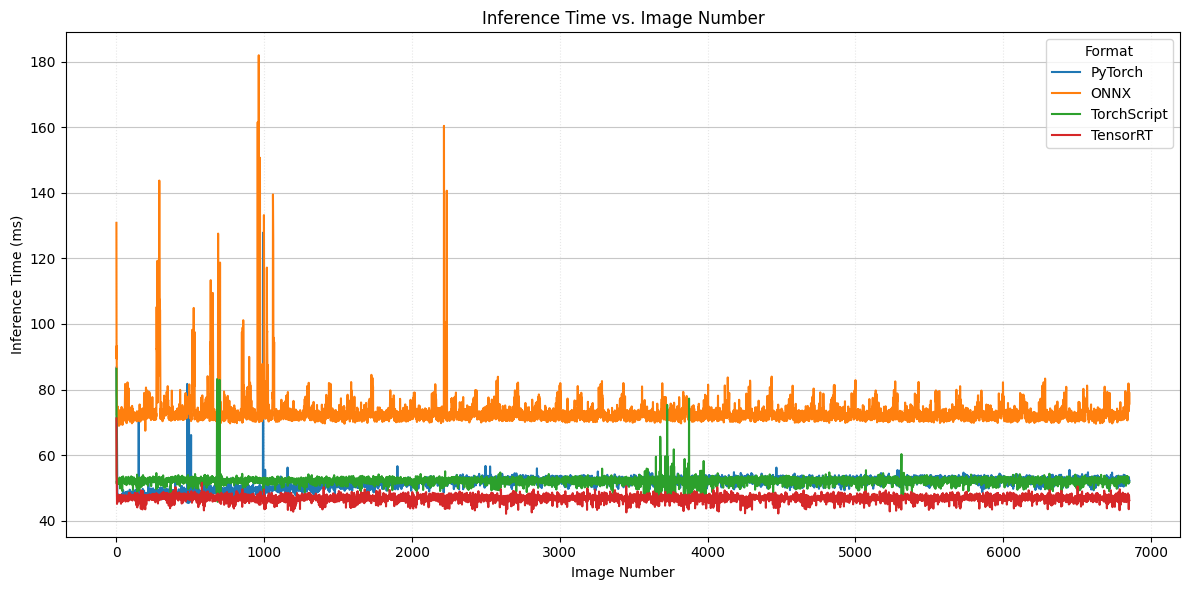

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=line_df, x='image_number', y='inference_time', hue='library')
plt.xlabel('Image Number')
plt.ylabel('Inference Time (ms)')
plt.title('Inference Time vs. Image Number')
plt.legend(title='Format')

# Добавляем сетку:
plt.grid(axis='y', linestyle='-', alpha=0.7)  # Горизонтальная сетка (более заметная)
plt.grid(axis='x', linestyle=':', alpha=0.3)  # Вертикальная сетка (более тонкая)

plt.tight_layout()
plt.show()

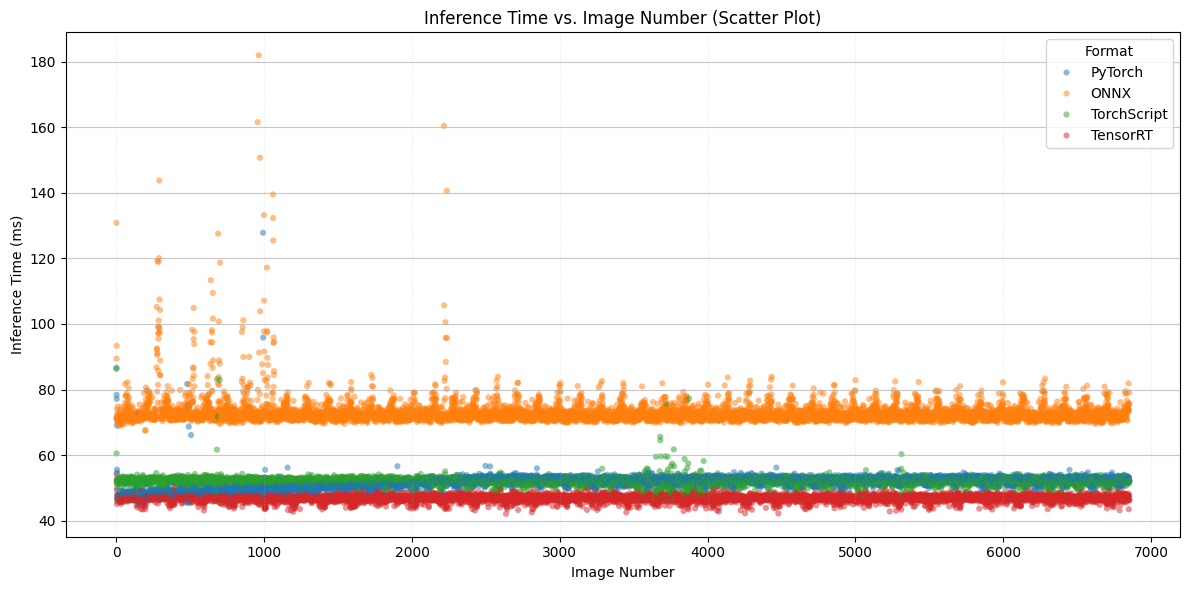

In [ ]:
# Строим точечную диаграмму (используем тот же line_df)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=line_df, x='image_number', y='inference_time', hue='library', s=20, edgecolor='none', alpha=0.5) #добавил s=20, чтобы точки были не слишком мелкими
plt.xlabel('Image Number')
plt.ylabel('Inference Time (ms)')
plt.title('Inference Time vs. Image Number (Scatter Plot)')
plt.legend(title='Format')

# Добавляем сетку:
plt.grid(axis='y', linestyle='-', alpha=0.7)  # Горизонтальная сетка (более заметная)
plt.grid(axis='x', linestyle=':', alpha=0.3)  # Вертикальная сетка (более тонкая)

plt.tight_layout()
plt.show()

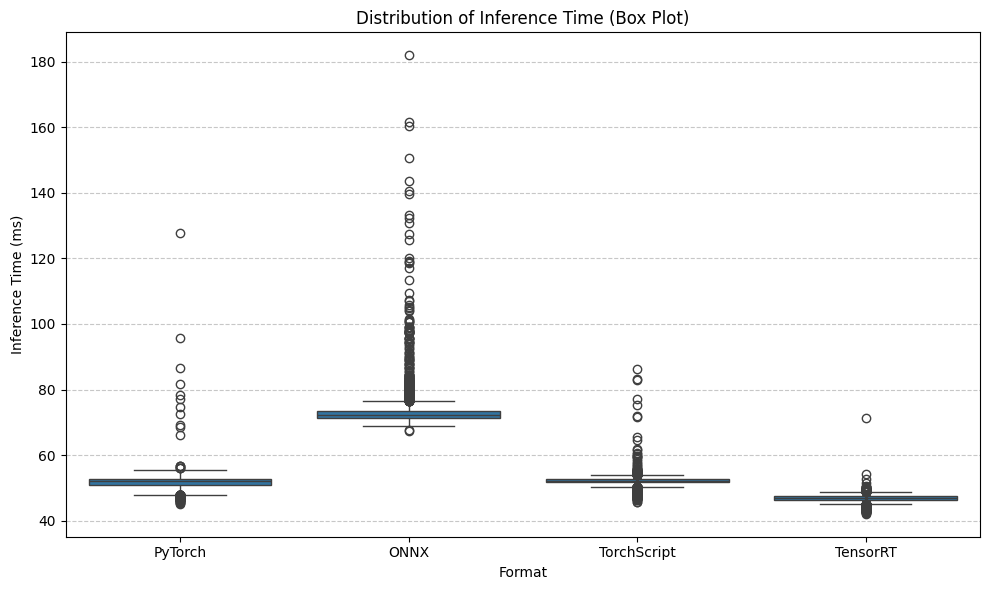

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Собираем данные в DataFrame
box_data = []
for library, lib_data in all_raw_results.items():
    for iteration, iter_data in lib_data.items():
        for result in iter_data[0]:
            if 'model_speed' in result and 'inference' in result['model_speed']:
                inference_time = result['model_speed']['inference']
                box_data.append({'library': library, 'inference_time': inference_time})
            else:
                print(f"Warning: Missing 'model_speed' or 'inference' in result for library {library}, iteration {iteration}")

box_df = pd.DataFrame(box_data)

plt.figure(figsize=(10, 6))
if not box_df.empty:
    sns.boxplot(data=box_df, x='library', y='inference_time')
    plt.xlabel('Format')
    plt.ylabel('Inference Time (ms)')
    plt.title('Distribution of Inference Time (Box Plot)')

    # Добавляем ТОЛЬКО горизонтальную сетку:
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("Error: No data found for boxplot. Check the structure and content of 'all_raw_results'.")